In [1]:
import tensorflow as tf

#reading arrays x and y
x = tf.constant([17.0, 18.0, 19.0,20.0,21.0], name='x')
y = tf.constant([22.0, 23.0, 24.0,25.0,26.0], name='y')



model = tf.global_variables_initializer()

with tf.Session() as session:
	session.run(model)
	print(session.run(x))
with tf.Session() as session:
	session.run(model)
	print(session.run(y))

[ 17.  18.  19.  20.  21.]
[ 22.  23.  24.  25.  26.]


In [2]:
#mean of x and y
sum1=tf.constant(0)
with tf.name_scope("mean_x"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            output =sess.run(x[i])
            sum1=tf.add(sum1,output)
        a=tf.divide(sum1,len(sess.run(x)))
        meanx=sess.run(a)
print(meanx)


sum1=tf.constant(0)
with tf.name_scope("mean_y"):
      with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            output =sess.run(y[i])
            sum1=tf.add(sum1,output)
        a=tf.divide(sum1,len(sess.run(y)))
        meany=sess.run(a)
print(meany)

19.0
24.0


In [3]:
#variance and covariance
sum2=tf.constant(0.0)
with tf.name_scope("Variance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(x[i],meanx)
            b=tf.square(a)
            sum2=tf.add(sum2,b)
        variance=sess.run(sum2)
print(variance)




sum3=tf.constant(0.0)
with tf.name_scope("Covariance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]),meanx)
            b=tf.subtract(sess.run(y[i]),meany)
            c=tf.multiply(a,b)
            sum3=tf.add(sum3,c)
        covariance=sess.run(sum3)
print(covariance)


10.0
10.0


In [4]:
#value of m
with tf.name_scope("value_of_m"):
    l=tf.divide(covariance,variance)
print(l)

1.0


In [5]:
#value of c
with tf.name_scope("value_of_c"):
    me=tf.to_float(meany)
    m1=tf.multiply(l,meanx)
    m=tf.subtract(me,m1)

with tf.Session() as session:
	session.run(model)
	print(session.run(m))

5.0


In [6]:
#Estimating Y values from X values
import numpy 
import tensorflow as tf
with tf.Session() as sess:
    x1=sess.run(x)
    y1=sess.run(y)
graph_X = numpy.asarray(x1)
graph_Y = numpy.asarray(y1)


x2=tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])
with tf.Session() as sess:
    x3=sess.run(x2)
x4=numpy.asarray(x3)

y2=[0]*5
    
with tf.Session() as sess:
        for i in range(len(sess.run(x2))):
            xx = sess.run(x2[i])
            a=tf.multiply(xx,l)
            b=tf.add(a,m)
            y2[i]=sess.run(b)
print(y2)

[6.0, 7.0, 8.0, 9.0, 10.0]


In [7]:
#Root mean square error
with tf.name_scope("RMS_error"):
    rms=tf.sqrt(tf.reduce_mean(tf.squared_difference(x,y)))
    
with tf.Session() as sess:
    print(sess.run(rms))

5.0


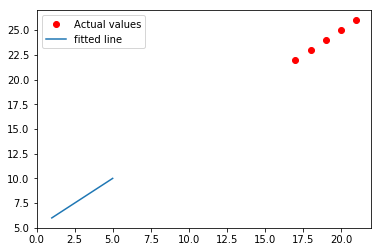

In [9]:
#Graph
import matplotlib.pyplot as plt
plt.plot(graph_X,graph_Y, 'ro', label='Actual values')
plt.plot(x4, y2, label='fitted line')
plt.legend()
plt.show()